Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.


### General - Import libraries to be used

In [63]:
# Import important library

import pandas as pd
import numpy as np

import matplotlib.pyplot as mplot
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Question 1 - (2.5 points)

Load the data set 

In [88]:
parkinsons = pd.read_csv("parkinsons.data")

print("Total Rows and columns in the original dataset is " , parkinsons.shape)
parkinsons.head(5)

Total Rows and columns in the original dataset is  (195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Question 2 - Points 2.5
It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. 

In [89]:
### NULL Check across all columns
print("The total NOTNULL values in columns is " , sum([True for idx,row in parkinsons.iterrows() if any(row.isnull())]))

print("The total NA values in columns is " , sum([True for idx,row in parkinsons.iterrows() if any(row.isna())]))


The total NOTNULL values in columns is  0
The total NA values in columns is  0


In [66]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

### Question 3 - (15 points) 
Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? 

In [67]:
print("Summary Statistics across all quantitative elements to understand the dataset's basic charactertistics (Mean , median etc )")
parkinsons.describe().transpose()

Summary Statistics across all quantitative elements to understand the dataset's basic charactertistics (Mean , median etc )


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


TARGET Variable - status - Health status of the subject (one) - Parkinson's, (zero) - healthy
1    147
0     48
Name: status, dtype: int64
Scatterplot - vocal fundamental frequency Max VS Min 


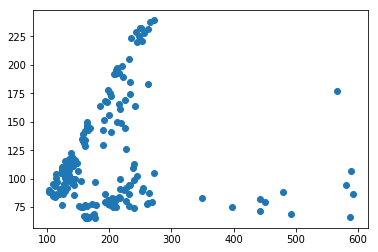

In [68]:
print("TARGET Variable - status - Health status of the subject (one) - Parkinson's, (zero) - healthy")
print(parkinsons['status'].value_counts())

print("Scatterplot - vocal fundamental frequency Max VS Min ")
mplot.scatter(parkinsons['MDVP:Fhi(Hz)'],parkinsons['MDVP:Flo(Hz)'])
mplot.show()

In [69]:
# Dropping the NAME column in the dataset as it does not add any value to the quantitative analysis.
parkinsons.drop("name",axis=1,inplace=True)

In [ ]:
# BI-VARIATE Analysis of all elements with a crossplot

sns.pairplot(parkinsons,diag_kind='kde', hue = "status" , size = 3)

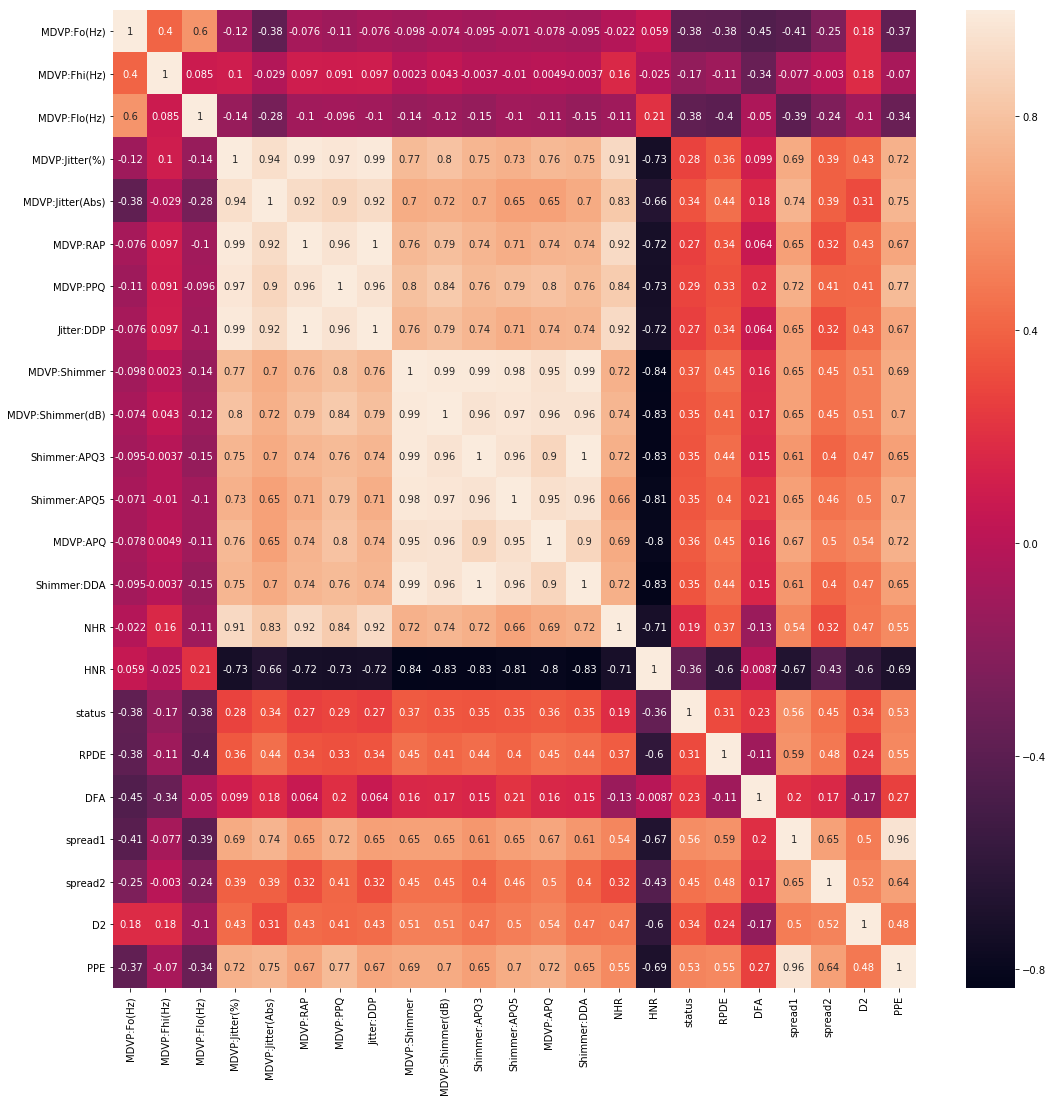

In [71]:
# BI-VARIATE Analysis of all elements for correlation with a heatmap

mplot.figure(figsize=(18 , 18))

parkinsons_corr = parkinsons.corr()
sns.heatmap(parkinsons_corr, xticklabels = parkinsons_corr.columns.values, yticklabels = parkinsons_corr.columns.values, annot = True);


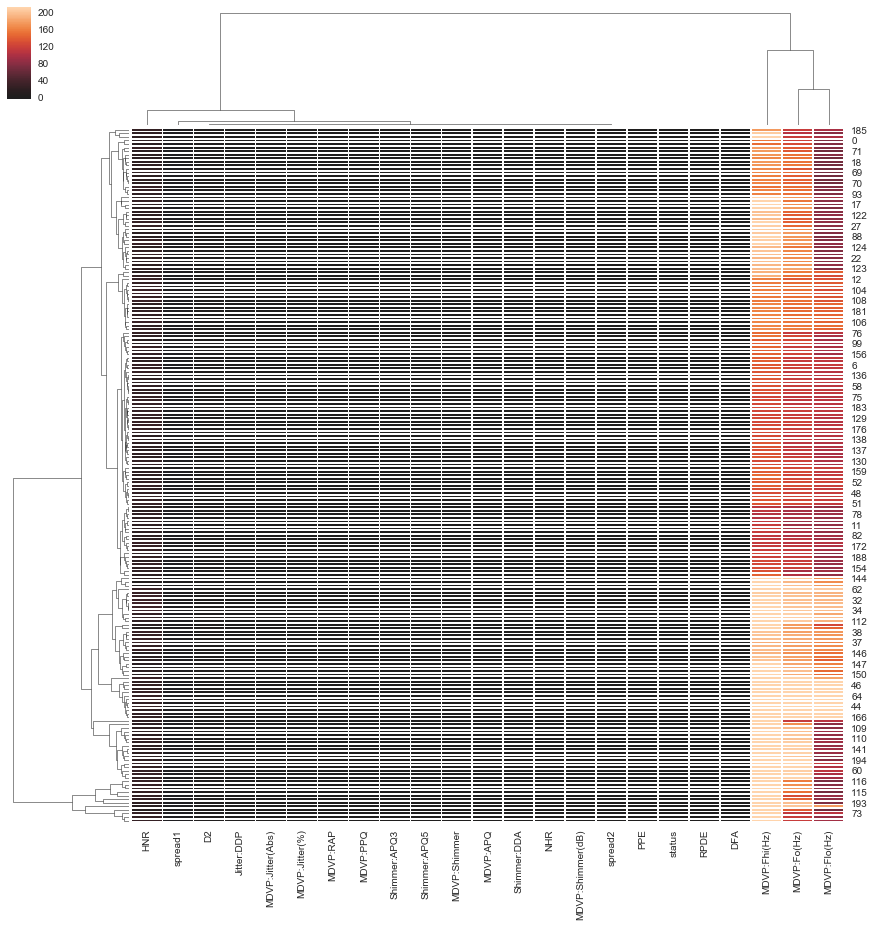

In [82]:
# Attempt to cluster the data and represent as a heat map.

sns.set(color_codes=True)
sns.clustermap(parkinsons, robust=True, figsize=(15,15), linewidths=.75 , center=0)

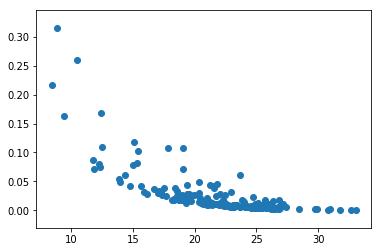

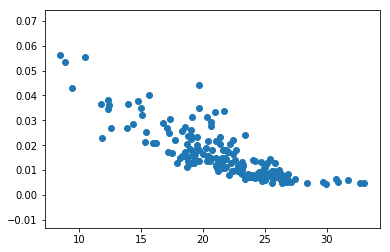

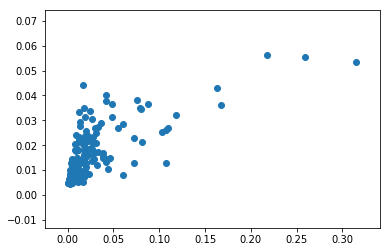

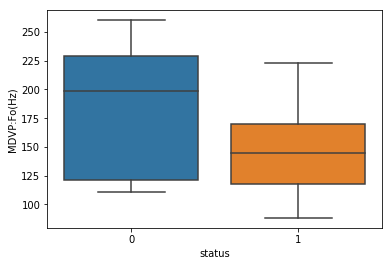

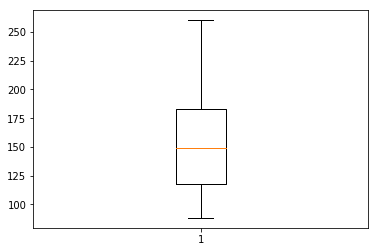

In [70]:
mplot.scatter(parkinsons["HNR"],parkinsons["NHR"])
mplot.show()
mplot.scatter(parkinsons["HNR"],parkinsons["Shimmer:APQ3"])
mplot.show()
mplot.scatter(parkinsons["NHR"],parkinsons["Shimmer:APQ3"])
mplot.show()

sns.boxplot(x="status" , y="MDVP:Fo(Hz)" , data=parkinsons)
mplot.show()

mplot.boxplot(parkinsons["MDVP:Fo(Hz)"])
mplot.show()

#sns.boxplot(x="status" , y="Shimmer:DDA" , data=parkinsons)
#mplot.show


Univariate Analysis for the feature HNR
The grapgh below shows that parkinson's disease is less at the HNR point (25) and high during this HNR range (19-21).


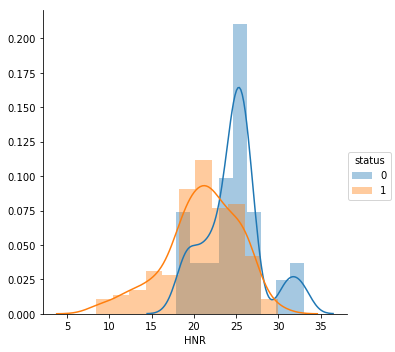

In [393]:
print("Univariate Analysis for the feature HNR")
print("The graph below shows that parkinson's disease is less at the HNR point (25) and high during this HNR range (19-21).")
sns.FacetGrid(parkinsons,hue ="status",size = 5).map(sns.distplot,"HNR").add_legend()

Univariate Analysis for the feature NHR
The grapgh below shows that parkinson's disease is Low at the NHR range (0.00 to 0.001) and high during this NHR range (0.001-0.002 ).


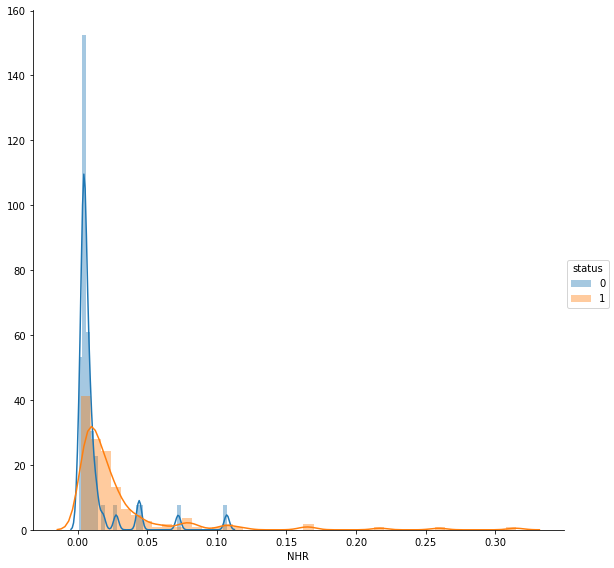

In [39]:
print("Univariate Analysis for the feature NHR")
print("The grapgh below shows that parkinson's disease is Low at the NHR range (0.00 to 0.001) and high during this NHR range (0.001-0.002 ).")
sns.FacetGrid(parkinsons,hue ="status",size = 8).map(sns.distplot,"NHR").add_legend()

In [83]:
print("Observation 1 - Bi-Var -> HNR has a negative correlation to NHR and viceversa.")
print("Observation 2 - Uni-Var -> Sample Dataset has 75% of patients diagonised with parkinson's.")
print("Observation 3 - Bi-Var -> Some features are positively correlated like ")
print("Observation 4 - Bi-Var -> Some features are negatively correlated like ....   ")


Observation 1 - Bi-Var -> HNR has a negative correlation to NHR and viceversa.
Observation 2 - Uni-Var -> Sample Dataset has 75% of patients diagonised with parkinson's.
Observation 3 - Bi-Var -> Some features are positively correlated like ....   
Observation 4 - Bi-Var -> Some features are negatively correlated like ....   


### Question 4 - 
Split the data set into training and test set in the ratio of 70:30 (Training:Test) 

In [41]:
y=parkinsons['status']
X=parkinsons.drop('status',axis=1)
print(X.shape)
print(y.shape)

(195, 22)
(195,)


In [42]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.30,random_state=1)

print(X_train.shape)
print(X_test.shape)

(136, 22)
(59, 22)


### Question 5 - (5 points) 
Create the model using “entropy” method of reducing the entropy and fit it to training data. 

In [43]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state = 100)

In [44]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Question 6 - (7.5 points)

Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. 

In [90]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File,filled=True, feature_names = list(X_train), class_names = list(train_label))

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.040734
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.067644
spread1           0.000000
spread2           0.000000
D2                0.079409
PPE               0.387263


In [91]:
#system("dot -Tpng credit_tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [92]:
y_predict = dt_model.predict(X_test)

print('Training set records count ->' , X_train.shape)
print('Test set records count ->' , X_test.shape)
print('Training set accuracy score ->' , dt_model.score(X_train , train_labels) *100)
print('Test set accuracy score ->' , dt_model.score(X_test , test_labels)*100)

Training set records count -> (136, 22)
Test set records count -> (59, 22)
Training set accuracy score -> 100.0
Test set accuracy score -> 88.13559322033898


In [93]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[13  6]
 [ 1 39]]


In [94]:
y_predict = dt_model.predict(X_train)
print(metrics.confusion_matrix(train_labels, y_predict))

[[ 29   0]
 [  0 107]]


### Question 7 -  (20 points)
Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?  

In [95]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf=7 , random_state=0)

reg_dt_model.fit(X_train, train_labels)
reg_train_score = reg_dt_model.score(X_train , train_labels)

reg_dt_model.fit(X_test, test_labels)
reg_test_score = reg_dt_model.score(X_test , test_labels)

In [96]:
print(reg_test_score)
print(reg_train_score)

0.9661016949152542
0.9705882352941176


In [97]:
y_predict = reg_dt_model.predict(X_test)
print(metrics.confusion_matrix(test_labels, y_predict))

y_predict = reg_dt_model.predict(X_train)
print(metrics.confusion_matrix(train_labels, y_predict))

[[18  1]
 [ 1 39]]
[[27  2]
 [22 85]]


In [98]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.040734
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.067644
spread1           0.000000
spread2           0.000000
D2                0.079409
PPE               0.387263


In [99]:
#system("dot -Tpng credit_tree_regularized.dot -o credit_tree_regularized.png")
Image("credit_tree_regularized.png")

### Question 8 - (10 points)
Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

In [283]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50 , criterion ='entropy' , bootstrap = True, max_features = 'sqrt')
#rfc = RandomForestClassifier(n_estimators = 50 , criterion ='gini' , bootstrap = True, max_features = 'sqrt')
        
rfc = rfc.fit(X_train, train_labels)
test_pred = rfc.predict(X_test)

# Training predictions (to demonstrate overfitting)
train_rfc_predictions = rfc.predict(X_train)
train_rfc_probs = rfc.predict_proba(X_train)[:, 1]

# Testing predictions (to determine performance)
test_rfc_predictions = rfc.predict(X_test)
test_rfc_probs = rfc.predict_proba(X_test)[:, 1]

print('The Test score using Random Forest is ' ,  rfc.score(X_test , test_labels) * 100 )
print('The Train score using Random Forest is ' , rfc.score(X_train , train_labels) * 100 )

The Test score using Random Forest is  86.4406779661017
The Train score using Random Forest is  100.0


In [285]:

# Actual class predictions
rf_predictions = rfc.predict(X_test)
# Probabilities for each class
rf_probs = rfc.predict_proba(X_test)[:, 1]
#print(test_labels)
roc_value = roc_auc_score(test_labels, rf_probs)
print("The ROC - AUC score is " , roc_value)

The ROC - AUC score is  0.9421052631578948


In [60]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in rfc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')
reg_dt_model

Average number of nodes 20
Average maximum depth 5


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.68 Test: 0.83 Train: 1.0
Roc Baseline: 0.5 Test: 0.95 Train: 1.0


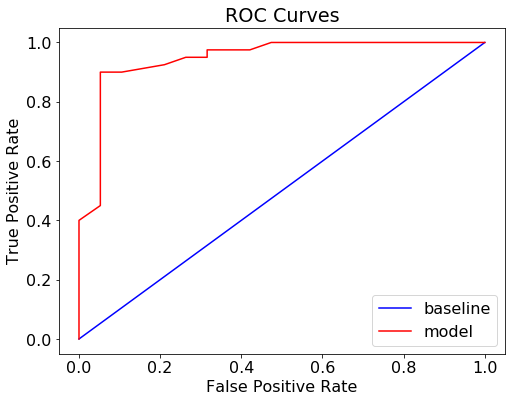

<Figure size 432x288 with 0 Axes>

In [61]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(test_rfc_predictions, test_rfc_probs, train_rfc_predictions, train_rfc_probs)
plt.savefig('roc_auc_curve.png')